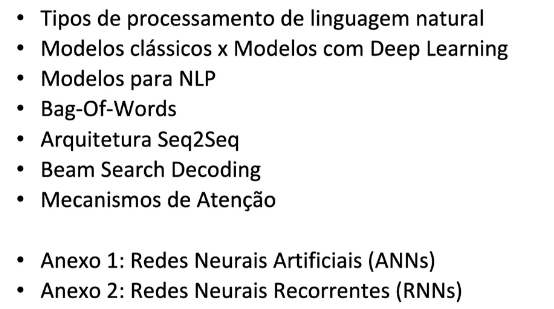

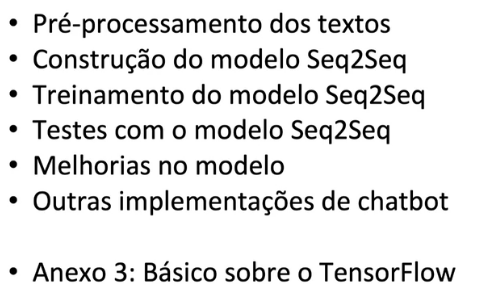

* Tipos de NLP
 * DNLP (relação entre NLP e Deep Learning)
 * Seq2Seq (Codifica as frases e depois decodificas as frases) [é o melhor modelo pois são dois modelos em um input e output ]
 * Bag-of-words (conta quantas palavras existem num determinado padrao, em relacao a todas palavras que existem) [cada palavra ocupa uma posição unica do vetor de todas palavras, assim como a ultima posição do array representa as palavras que não devem ser consideradas normais]
 * CNN (podem usado em NLP também, assim como com imagens)
 

bag of words 
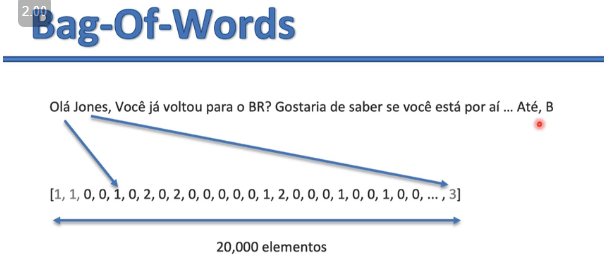

* Bag of words é problematico pois tem números de saidas fixos (outputs fixos)
* A ordem das palavras não importa
* A entrada é fixa

seq2seq
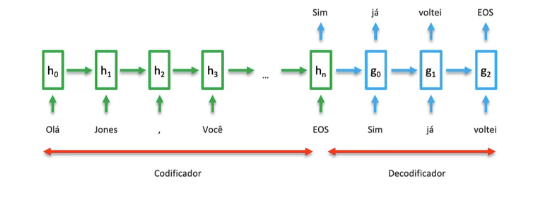

cnn
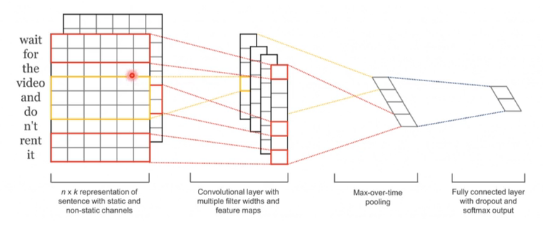

# Seq2Seq

Arquiteturas RNN (para chat bots usando RNNs o ideal é usarmos many to many, pois assim, conseguimos com varias entradas ter varias saidas)

* em vez de usarmos a quantidade de palavras igual ao bag of words, utilizamos dentro da rnn a posição da palavra no input

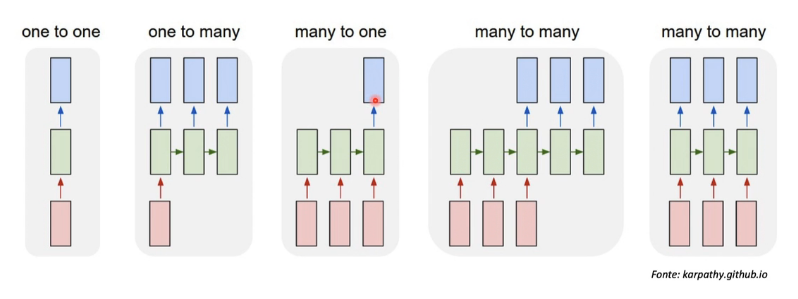

* em vez de passarmos a posição damos um identificador unico para cada palavra
* O primeiro valor do vetor é o inicio da frase e o ultimo o final da frase
* O valor final é representado por EOS (end of sentence), cada palavra que será usada no output recebe uma % de probabilidade de ser usada, os outputs terminam quando não exista mais nenhuma palavra com probabilidade maior que a EOS (que também é uma palavra)

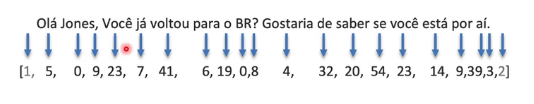

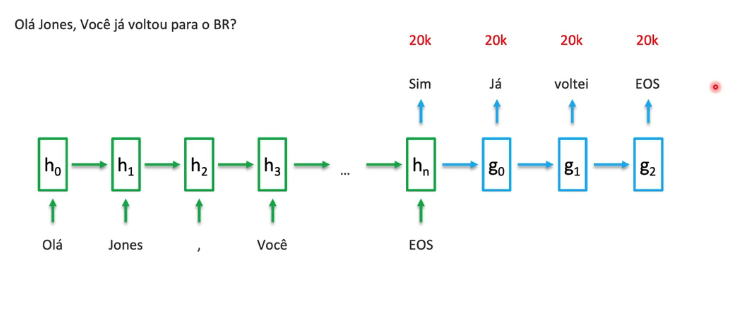

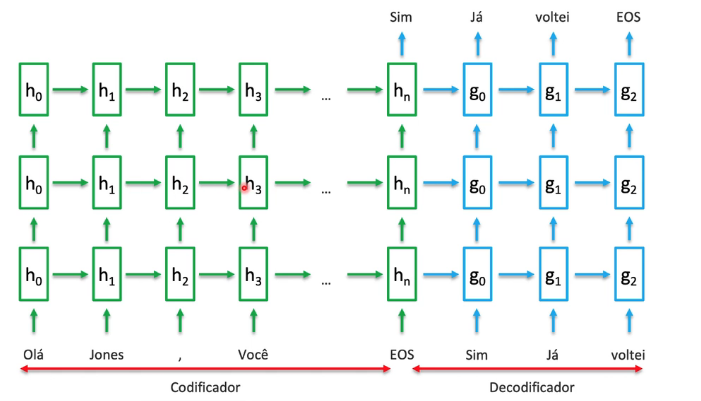

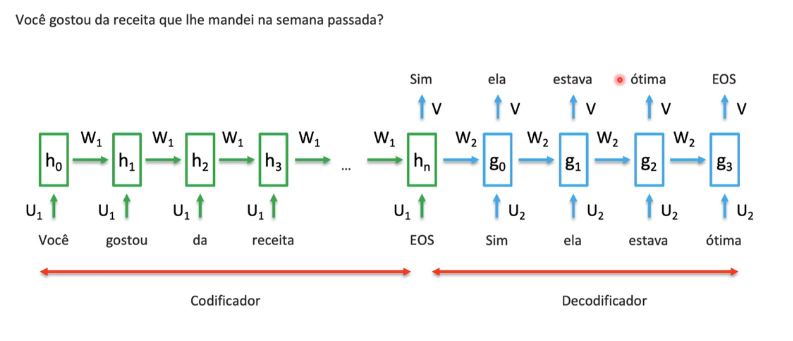

# Maneiras de Decoding

Seleciona a palavra com maior probabilidade, depois a proxima com maior probabilidade... 
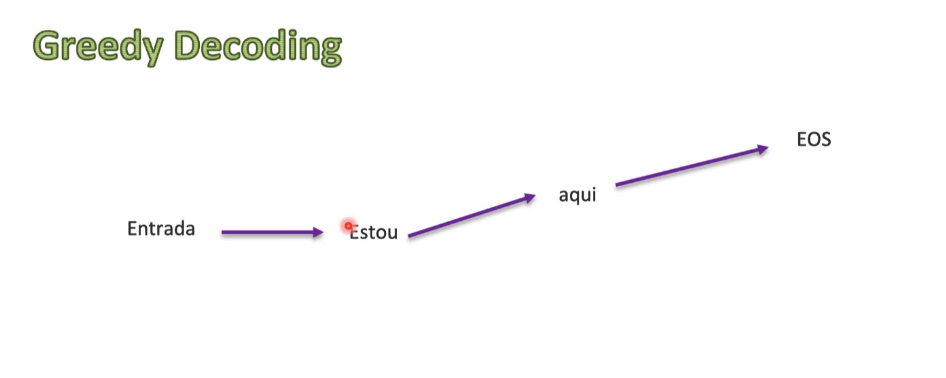

Seleciona as palavras com maior probabilidade, depois as proximas, (usa mais processamento, mas da mais possibilidades)
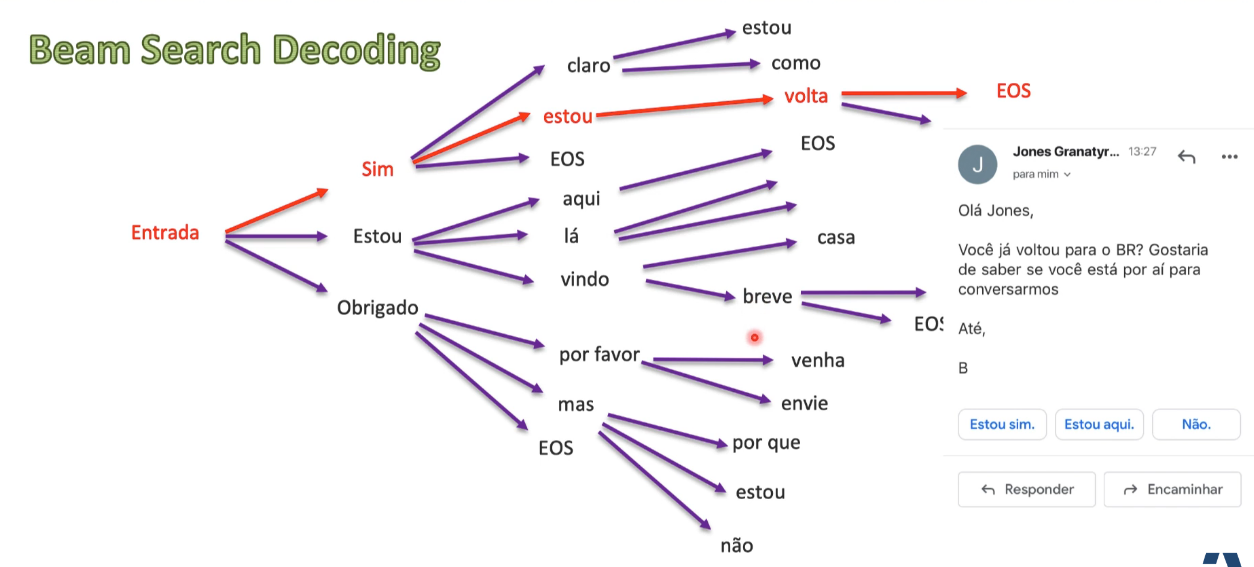

Mecanismos de atenção, faz com que as proximas partes da rede decodificadora, reveja os pesos para gerar a proxima palavra

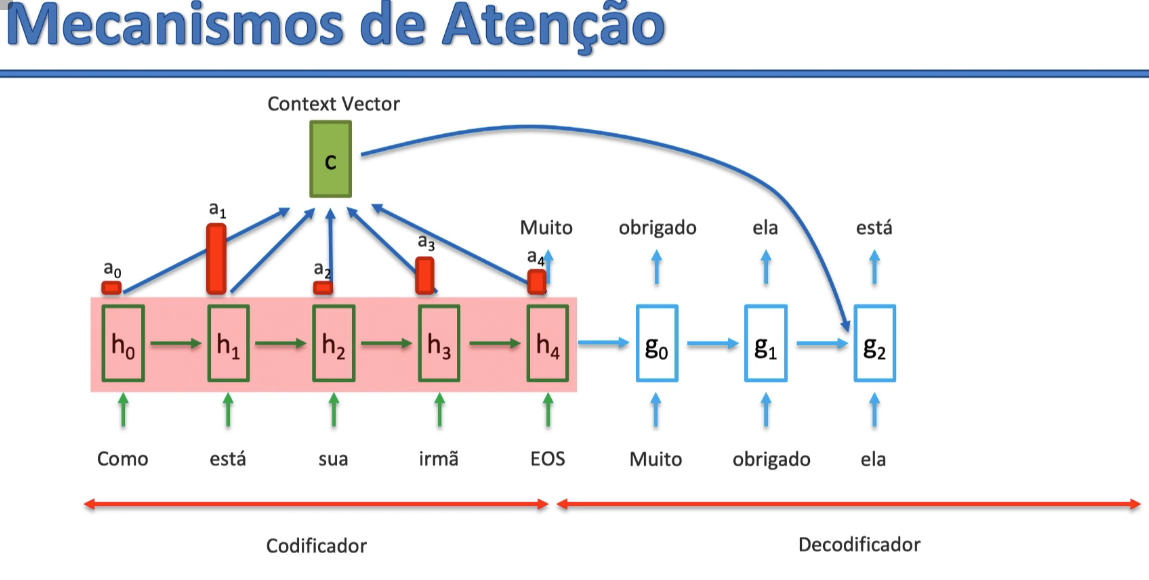

In [15]:
import pandas as pd
import numpy as np
import re
import time
import keras

In [118]:
movie_lines_url = 'C:/Users/Ludson Fróes/Desktop/dataset/TensorFlow Deep Learning e Python Construa um Chatbot/movie_lines.txt'
movie_conversations_url = 'C:/Users/Ludson Fróes/Desktop/dataset/TensorFlow Deep Learning e Python Construa um Chatbot/movie_conversations.txt'

In [119]:
# Read and create movie_lines DataFrame
with open(movie_lines_url) as movie_lines:
    movie_lines = movie_lines.read()
    list_movie_lines = movie_lines.split('\n')
    base_movie_lines = [value.split(' +++$+++ ') for value in list_movie_lines]
    df_movie_lines = pd.DataFrame(base_movie_lines)

df_movie_lines = df_movie_lines[[0,4]]
df_movie_lines.columns = ['id','sentence']
df_movie_lines = df_movie_lines[:-1]

# Read and create movie_conversations DataFrame
with open(movie_conversations_url) as movie_conversations:
    movie_conversations = list(movie_conversations)
    base_movie_conversations = [value.replace('\n','').split(' +++$+++ ') for value in movie_conversations]
    df_movie_conversations = pd.DataFrame(base_movie_conversations)

In [121]:
question = []
answer = []
for i in df_movie_conversations[3].values:
    list_of_cods = eval(i)
    for cod in range(len(list_of_cods)-1):
        question.append(list_of_cods[cod])
        answer.append(list_of_cods[cod+1])
        
df_chat_bot = pd.DataFrame({'question':question,
                           'answer':answer})

In [122]:
display(df_chat_bot)

,question,answer
0,L194,L195
1,L195,L196
2,L196,L197
3,L198,L199
4,L200,L201
...,...,...
221611,L666369,L666370
221612,L666370,L666371
221613,L666371,L666372
221614,L666520,L666521


In [56]:

chat_bot_sentences = df_chat_bot.merge(df_movie_lines,left_on='question',right_on='id',suffixes=('question','answer'))
chat_bot_sentences = chat_bot_sentences.merge(df_movie_lines,left_on='answer',right_on='id',suffixes=('_question','_answer'))

chat_bot_sentences = chat_bot_df[['sentence_question','sentence_answer']]

In [65]:
display(chat_bot_sentences)

,sentence_question,sentence_answer
0,Can we make this quick? Roxanne Korrine and A...,"Well, I thought we'd start with pronunciation,..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...
3,You're asking me out. That's so cute. What's ...,Forget it.
4,"No, no, it's my fault -- we didn't have a prop...",Cameron.
...,...,...
221611,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...
221612,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...
221613,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...
221614,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob..."


In [108]:
from nltk import word_tokenize
from nltk import FreqDist
from string import punctuation

In [113]:
def preprocessing(sentence, punc=''):
    
    for pt in punc:
        sentence = sentence.replace(pt,'')
    
    list_sentence = word_tokenize(sentence)
    
    return list_sentence

In [127]:
df_movie_lines['list_sentence'] = df_movie_lines['sentence'].apply(preprocessing, punc=punctuation)

In [129]:
list_words = []
for i in df_movie_lines['list_sentence'].values:
    list_words.extend(i)

In [130]:
FreqDist(list_words)

FreqDist({'I': 102347, 'you': 99523, 'the': 88012, 'to': 79227, 'a': 66182, 'it': 40623, 'of': 37886, 'and': 35229, 'in': 32059, 'that': 31316, ...})